In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import Ridge, Lasso
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

## Problem 1

In [2]:
def gen_p1_data():
    mean = [0, 0]
    cov = [[1, 0.99999], [0.99999, 1]]
    x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
    epsilon = np.random.normal(0, 1, 100)

    y = 1 + x1 + x2 + epsilon
    X = pd.DataFrame({'X1': x1, 'X2': x2})
    return y, X

### 1.1

In [3]:
np.random.seed(1)
y, X = gen_p1_data()
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.733   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.727   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     133.0   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  1.60e-28   \\
\textbf{Time:}             &     16:53:23     & \textbf{  Log-Likelihood:    } &   -141.69   \\
\textbf{No. Observations:} &         100      & \textbf{  AIC:               } &     289.4   \\
\textbf{Df Residuals:}     &          97      & \textbf{  BIC:               } &     297.2   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

### 1.2

In [4]:
np.random.seed(42)
y, X = gen_p1_data()
model2 = sm.OLS(y, sm.add_constant(X)).fit()
print(model2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.686   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.679   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     105.9   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  4.13e-25   \\
\textbf{Time:}             &     16:53:23     & \textbf{  Log-Likelihood:    } &   -147.11   \\
\textbf{No. Observations:} &         100      & \textbf{  AIC:               } &     300.2   \\
\textbf{Df Residuals:}     &          97      & \textbf{  BIC:               } &     308.0   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

### 1.3

In [5]:
n =1000
beta = {'beta1': [], 'beta2': []}
for _ in range(n):
    y, X = gen_p1_data()
    model = sm.OLS(y, sm.add_constant(X)).fit()
    beta['beta1'].append(model.params['X1'])
    beta['beta2'].append(model.params['X2'])
beta = pd.DataFrame(beta)

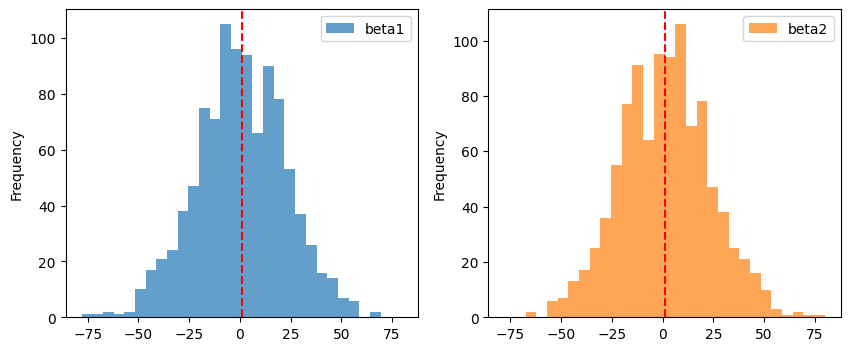

In [6]:
ax = beta.plot.hist(bins=30, alpha=0.7, subplots=True, layout=(1,2), figsize=(10,4))
ax[0, 0].axvline(x=1, color='red', linestyle='--')
ax[0, 1].axvline(x=1, color='red', linestyle='--')
ax[0,0].figure.savefig("./figures/problem1_simulation_histograms.png")

In [7]:
beta.std()

beta1    22.069571
beta2    22.069610
dtype: float64

### 1.4

In [8]:
y, X = gen_p1_data()
betas = []
for alpha in [0.01, 0.1, 1]:
    model = sm.OLS(y, sm.add_constant(X)).fit_regularized(L1_wt=0, alpha=alpha)
    betas.append(model.params)
betas = pd.DataFrame(betas, index=[0.01, 0.1, 1], columns=['const', 'X1', 'X2'])
betas.index.name = 'alpha'
print(betas.to_latex())

\begin{tabular}{lrrr}
\toprule
 & const & X1 & X2 \\
alpha &  &  &  \\
\midrule
0.010000 & 0.880284 & 0.974755 & 0.987209 \\
0.100000 & 0.800695 & 0.937373 & 0.938555 \\
1.000000 & 0.413150 & 0.656364 & 0.656445 \\
\bottomrule
\end{tabular}



### 1.5

In [9]:
n =1000
alpha = 0.01
beta = {'beta1': [], 'beta2': []}
for _ in range(n):
    y, X = gen_p1_data()
    model = sm.OLS(y, sm.add_constant(X)).fit_regularized(L1_wt=0, alpha=alpha)
    beta['beta1'].append(model.params[1])
    beta['beta2'].append(model.params[2])
beta = pd.DataFrame(beta)

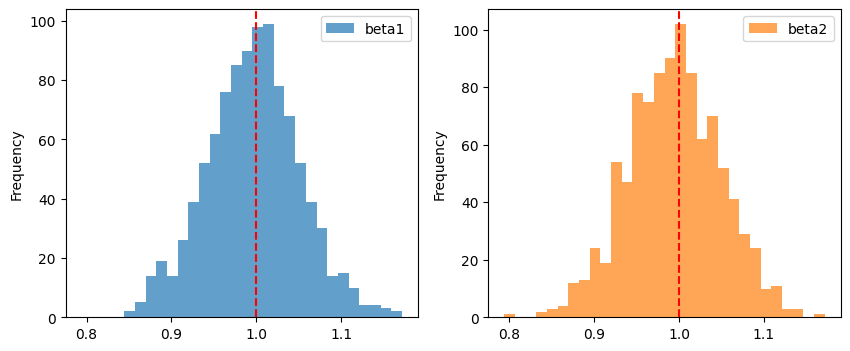

In [10]:
ax = beta.plot.hist(bins=30, alpha=0.7, subplots=True, layout=(1,2), figsize=(10,4))
ax[0,0].axvline(x=1, color='red', linestyle='--')
ax[0,1].axvline(x=1, color='red', linestyle='--')
ax[0,0].figure.savefig("./figures/problem1_ridge_histograms.png")

In [11]:
beta.std()

beta1    0.054158
beta2    0.054481
dtype: float64

## Problem 2

In [27]:
import numpy as np
np.random.seed(42)

n_samples = 100
n_features = 50

X = np.random.normal(0, 1, (n_samples, n_features))
true_beta = np.zeros(n_features)
true_beta[:3] = [5, -2, 3]

y = np.dot(X, true_beta) + np.random.normal(0, 1, n_samples)

### 2.1

In [28]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.params[4:]
print('Non-zero coefficients (OLS):', (model.params[4:] != 0).sum())

num_sig = (model.pvalues[4:] < 0.05).sum()
print(f'Number of significant coefficients (OLS): {num_sig}')

Non-zero coefficients (OLS): 47
Number of significant coefficients (OLS): 4


### 2.2

In [29]:
for alpha in [0.1, 1, 100]:
    model = sm.OLS(y, sm.add_constant(X)).fit_regularized(L1_wt=1, alpha=alpha)
    num_nonzero = np.sum(model.params[1:] != 0)
    print(f'Number of non-zero coefficients (Lasso, alpha={alpha}): {num_nonzero}')

Number of non-zero coefficients (Lasso, alpha=0.1): 20
Number of non-zero coefficients (Lasso, alpha=1): 3
Number of non-zero coefficients (Lasso, alpha=100): 0


In [30]:
model = sm.OLS(y, sm.add_constant(X)).fit_regularized(L1_wt=1, alpha=1)
model.params

array([ 0.        ,  3.7783428 , -0.9402984 ,  2.03919906,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### 2.3

In [16]:
alphas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]
coeffs = []
for alpha in alphas:
    model = sm.OLS(y, sm.add_constant(X)).fit_regularized(L1_wt=1, alpha=alpha)
    coeffs.append(model.params)
coeffs = pd.DataFrame(coeffs, index=alphas, columns=['const'] + [f'X{i}' for i in range(1, n_features + 1)])
coeffs.index.name = 'alpha'

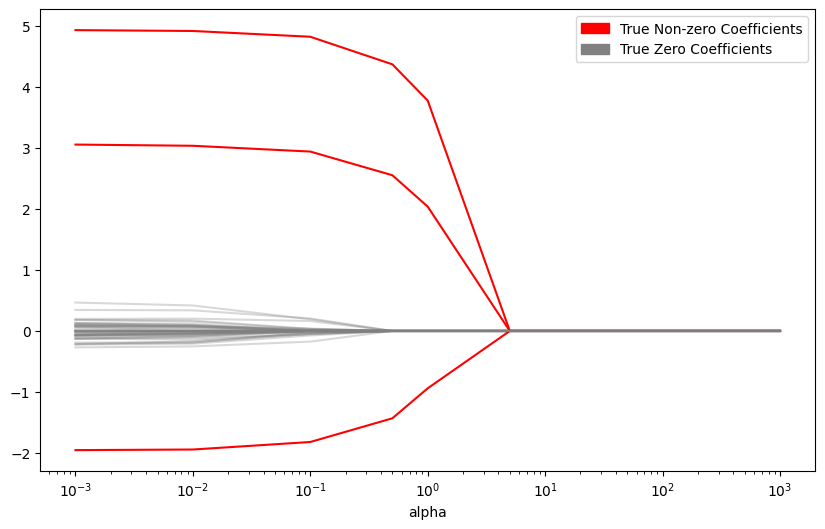

In [17]:
import matplotlib.patches as mpatches

ax = coeffs.plot(logx=True, figsize=(10,6), legend = False)
for i in range(coeffs.shape[1]):
    if 1 <= i <=3:
        ax.lines[i].set_color('red')
    else:
        ax.lines[i].set_color('grey')
        ax.lines[i].set_alpha(0.3)

# legend based on color
red_patch = mpatches.Patch(color='red', label='True Non-zero Coefficients')
grey_patch = mpatches.Patch(color='grey', label='True Zero Coefficients')
ax.legend(handles=[red_patch, grey_patch])
ax.figure.savefig("figures/problem2_lasso_path.png", dpi=300)

## Problem 3

In [18]:
import numpy as np
import pandas as pd

np.random.seed(100)
n = 1000

indicator = np.zeros(n)
for i in range(0, n, 200):
    indicator[i:i+100] = 1 

epsilon = np.zeros(n)
sigma2 = np.zeros(n)
epsilon[0] = np.random.normal(0, 1)

for t in range(1, n):
    sigma2[t] = 1 + 0.5 * (epsilon[t-1]**2) + 10 * indicator[t]
    epsilon[t] = np.random.normal(0, np.sqrt(sigma2[t]))

y = np.zeros(n)
phi = 0.5
for t in range(1, n):
    y[t] = phi * y[t-1] + epsilon[t]

### 3.1

In [19]:
ar1 = AutoReg(y, lags=1).fit()
print(ar1.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &             y             & \textbf{  No. Observations:  } &            1000            \\
\textbf{Model:}         &         AutoReg(1)        & \textbf{  Log Likelihood     } &         -2671.819          \\
\textbf{Method:}        &      Conditional MLE      & \textbf{  S.D. of innovations} &           3.510            \\
\textbf{Date:}          &      Sat, 20 Dec 2025     & \textbf{  AIC                } &          5349.639          \\
\textbf{Time:}          &          16:53:25         & \textbf{  BIC                } &          5364.359          \\
\textbf{Sample:}        &             1             & \textbf{  HQIC               } &          5355.234          \\
\textbf{}               &            1000           & \textbf{                     } &                            \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$}

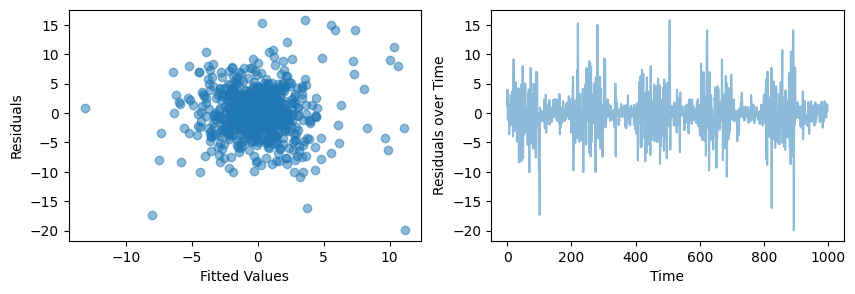

In [20]:
resid = ar1.resid
fitted = ar1.fittedvalues
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(fitted, resid, alpha=0.5)
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[1].plot(range(len(resid)), resid, alpha=0.5)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Residuals over Time')
fig.savefig("./figures/problem3_ar1_residuals.png", dpi=300, bbox_inches='tight')

### 3.2

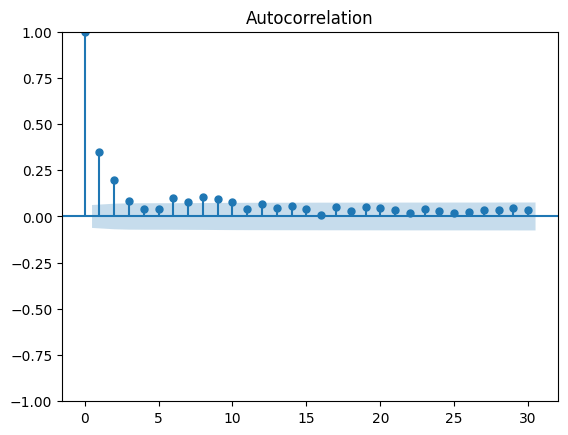

In [21]:
ax = plot_acf(resid**2)
ax.figure.savefig("./figures/problem3_acf_squared_residuals.png", dpi=300, bbox_inches='tight')

### 3.3

In [22]:
resid2 = resid**2
data = pd.DataFrame({'resid2': resid2[1:], 'resid2_lag1': resid2[:-1], 'indicator': indicator[2:]})

model_var = sm.OLS(data['resid2'], sm.add_constant(data[['resid2_lag1', 'indicator']])).fit()
print(model_var.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      resid2      & \textbf{  R-squared:         } &     0.155   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.154   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     91.52   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  3.29e-37   \\
\textbf{Time:}             &     16:53:26     & \textbf{  Log-Likelihood:    } &   -4718.3   \\
\textbf{No. Observations:} &         998      & \textbf{  AIC:               } &     9443.   \\
\textbf{Df Residuals:}     &         995      & \textbf{  BIC:               } &     9457.   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                      & \textbf{coef} &

### 3.4

In [23]:
X_last = [[1, 4, 0], [1, 4, 1]]
predicted_variance = model_var.predict(X_last)
predicted_variance

array([ 4.18456431, 15.50883833])

In [25]:
# mu = ar1.predict()[-1]
sigma = np.sqrt(predicted_variance)

CI = pd.DataFrame(
    {"Lower Bound": -1.96 * sigma,
     "Upper Bound": 1.96 * sigma},
    index = ['Low Regime', 'High Regime']
)
print(CI.to_latex())


\begin{tabular}{lrr}
\toprule
 & Lower Bound & Upper Bound \\
\midrule
Low Regime & -4.009417 & 4.009417 \\
High Regime & -7.718727 & 7.718727 \\
\bottomrule
\end{tabular}

